In [15]:
from tensorflow import keras
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:


model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



In [18]:
early_stopping = EarlyStopping(
    monitor = "val_loss",
    patience=7,
   
)




model_checkpoint = ModelCheckpoint(
    "my_model.weights.h5",
    monitor = "val_loss",
    save_best_only = True,
    save_weights_only = True,
    verbose=1
   
)
print("done")

done


In [19]:
import numpy as np


num_samples = 1000
sequence_length = 50


X = np.zeros((num_samples, sequence_length, 1))
y = np.zeros((num_samples, sequence_length), dtype=np.int32)

for i in range(num_samples):
    freq = np.random.uniform(0.1, 0.5)
    phase = np.random.uniform(0, 2 * np.pi)
    t = np.linspace(0, 2 * np.pi, sequence_length)
    sin_wave = np.sin(freq * t + phase)
    
    X[i, :, 0] = sin_wave
    

    y[i] = np.digitize(sin_wave, bins=np.linspace(-1, 1, 10), right=True)

In [23]:
history = model.fit(X, y, epochs=30, batch_size=63, callbacks=[early_stopping, model_checkpoint])

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3451 - loss: 1.7059
Epoch 2/30
 3/16 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3602 - loss: 1.8215

/home/uzzu/Desktop/python/.venv/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/home/uzzu/Desktop/python/.venv/lib/python3.12/site-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.3658 - loss: 1.7440
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3658 - loss: 1.6982
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.3657 - loss: 1.6391
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.3635 - loss: 1.6440
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.3683 - loss: 1.6485
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.3828 - loss: 1.6499
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.3856 - loss: 1.6534
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.3910 - loss: 1.6364
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.3955 - loss: 1.5959
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.4113 - loss: 1.5833
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.3956 - loss: 1.5696
Epoch 13/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.4066 - 

In [24]:


history_dict = history.history



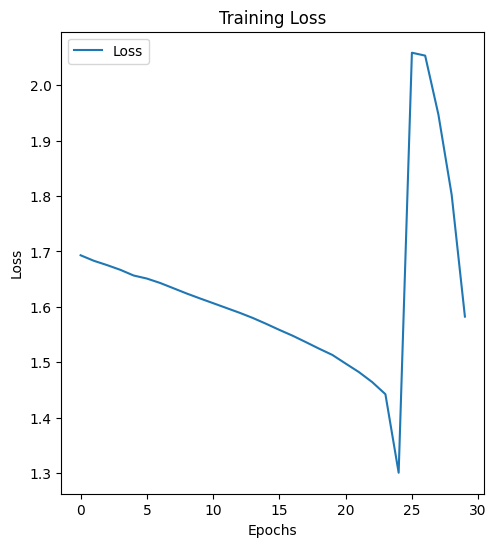

In [25]:


plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

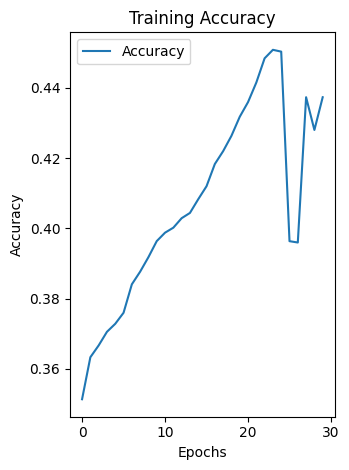

In [26]:
# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
